In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist

import matplotlib.pyplot as plt

In [147]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [148]:
X_train.shape, y_train.shape

((60000, 28, 28), (60000,))

In [149]:
X_train = tf.reshape(X_train, (-1, 28 * 28))
X_train = tf.cast(X_train, tf.float32) / 255.

X_test = tf.reshape(X_test, (-1, 28 * 28))
X_test = tf.cast(X_test, tf.float32) / 255.

y_train = tf.cast(y_train, tf.int64)
y_test = tf.cast(y_test, tf.int64)

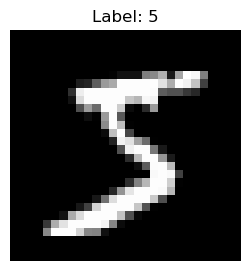

In [5]:
plt.figure(figsize=(3, 3))
plt.imshow(tf.reshape(X_train[0], (28, 28)), cmap='gray')
plt.title(f"Label: {y_train[0]}")
plt.axis('off')
plt.show()

In [6]:
batch_size = 128
trainDataset = tf.data.Dataset.from_tensor_slices((X_train, y_train)).shuffle(buffer_size=1024).batch(batch_size)
testDataset = tf.data.Dataset.from_tensor_slices((X_test, y_test)).batch(batch_size)

In [ ]:
for X, y in trainDataset.take(1):
	print(X.shape, y.shape)

(128, 784) (128,)


2025-07-01 11:58:00.579362: I tensorflow/core/framework/local_rendezvous.cc:407] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [8]:
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.losses import binary_crossentropy

In [ ]:
input_size = 28 * 28
hidden_size1 = 256
hidden_size2 = 128
output_size = 10

W1 = tf.Variable(tf.random.normal((input_size, hidden_size1), 0, 1))
W2 = tf.Variable(tf.random.normal((hidden_size1, hidden_size2), 0, 1))
W3 = tf.Variable(tf.random.normal((hidden_size2, output_size), 0, 1))

b1 = tf.Variable(tf.zeros((hidden_size1)))
b2 = tf.Variable(tf.zeros((hidden_size2)))
b3 = tf.Variable(tf.zeros((output_size)))

parameters = [W1, W2, W3, b1, b2, b3]
lr = 1e-3
epochs = 50
for epoch in range(epochs):
	for X, y in trainDataset:
		with tf.GradientTape() as t:
			y_hat = tf.nn.relu(tf.matmul(X, W1) + b1)
			y_hat = tf.nn.relu(tf.matmul(y_hat, W2) + b2) 
			y_hat = tf.matmul(y_hat, W3) + b3
			# y_hat = tf.argmax(y_hat, axis=1)
			loss = tf.reduce_mean(tf.nn.sparse_softmax_cross_entropy_with_logits(logits=y_hat, labels=y))
			# loss = tf.reduce_mean((y_hat - y) ** 2)
		
		gradients = t.gradient(loss, parameters)
		# for i in range(len(parameters)):
		#     parameters[i].assign_sub(lr * gradients[i])
		for param, grad in zip(parameters, gradients):
			param.assign_sub(lr * grad)
			



2025-07-01 11:58:02.052079: I tensorflow/core/framework/local_rendezvous.cc:407] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
2025-07-01 11:58:04.399723: I tensorflow/core/framework/local_rendezvous.cc:407] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
2025-07-01 11:58:09.915702: I tensorflow/core/framework/local_rendezvous.cc:407] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
2025-07-01 11:58:19.821228: I tensorflow/core/framework/local_rendezvous.cc:407] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
2025-07-01 11:58:37.937719: I tensorflow/core/framework/local_rendezvous.cc:407] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [ ]:
input_size = 28 * 28
hidden_size1 = 256
hidden_size2 = 128
output_size = 10

# 权重和偏置初始化
W1 = tf.Variable(tf.random.normal((input_size, hidden_size1), 0, 1))
W2 = tf.Variable(tf.random.normal((hidden_size1, hidden_size2), 0, 1))
W3 = tf.Variable(tf.random.normal((hidden_size2, output_size), 0, 1))

b1 = tf.Variable(tf.zeros((hidden_size1)))
b2 = tf.Variable(tf.zeros((hidden_size2)))
b3 = tf.Variable(tf.zeros((output_size)))

parameters = [W1, W2, W3, b1, b2, b3]

lr = 1e-3
epochs = 50

for epoch in range(epochs):
	# === Train phase ===
	train_loss_sum = 0.0
	train_correct = 0
	train_total = 0
	
	for X, y in trainDataset:
		with tf.GradientTape() as t:
			# 前向传播
			y_hat = tf.nn.relu(tf.matmul(X, W1) + b1)
			y_hat = tf.nn.relu(tf.matmul(y_hat, W2) + b2) 
			logits = tf.matmul(y_hat, W3) + b3

			# 损失
			loss = tf.reduce_mean(tf.nn.sparse_softmax_cross_entropy_with_logits(logits=logits, labels=y))

		# 梯度更新
		gradients = t.gradient(loss, parameters)
		for param, grad in zip(parameters, gradients):
			param.assign_sub(lr * grad)

		# 累积训练指标
		train_loss_sum += loss.numpy() * X.shape[0]
		preds = tf.argmax(logits, axis=1, output_type=tf.int64)
		train_correct += tf.reduce_sum(tf.cast(preds == y, tf.int32)).numpy()
		train_total += X.shape[0]

	# === Test phase ===
	test_loss_sum = 0.0
	test_correct = 0
	test_total = 0

	for X, y in testDataset:
		# 前向传播
		y_hat = tf.nn.relu(tf.matmul(X, W1) + b1)
		y_hat = tf.nn.relu(tf.matmul(y_hat, W2) + b2) 
		logits = tf.matmul(y_hat, W3) + b3

		loss = tf.reduce_mean(tf.nn.sparse_softmax_cross_entropy_with_logits(logits=logits, labels=y))

		test_loss_sum += loss.numpy() * X.shape[0]
		preds = tf.argmax(logits, axis=1, output_type=tf.int64)
		test_correct += tf.reduce_sum(tf.cast(preds == y, tf.int32)).numpy()
		test_total += X.shape[0]

	# === 打印每个 epoch 的结果 ===
	print(f"Epoch {epoch + 1:2d} | "
		  f"Train Loss: {train_loss_sum / train_total:.4f} | "
		  f"Train Acc: {train_correct / train_total:.4f} | "
		  f"Test Loss: {test_loss_sum / test_total:.4f} | "
		  f"Test Acc: {test_correct / test_total:.4f}")

Epoch  1 | Train Loss: 143.7115 | Train Acc: 0.6042 | Test Loss: 56.9982 | Test Acc: 0.7546
Epoch  2 | Train Loss: 49.4619 | Train Acc: 0.7784 | Test Loss: 37.6840 | Test Acc: 0.8130
Epoch  3 | Train Loss: 35.7634 | Train Acc: 0.8151 | Test Loss: 29.7858 | Test Acc: 0.8308
Epoch  4 | Train Loss: 28.6735 | Train Acc: 0.8331 | Test Loss: 24.9029 | Test Acc: 0.8430
Epoch  5 | Train Loss: 24.0959 | Train Acc: 0.8442 | Test Loss: 21.5862 | Test Acc: 0.8517
Epoch  6 | Train Loss: 20.8479 | Train Acc: 0.8524 | Test Loss: 19.2225 | Test Acc: 0.8593


2025-07-01 11:59:10.860233: I tensorflow/core/framework/local_rendezvous.cc:407] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch  7 | Train Loss: 18.3573 | Train Acc: 0.8595 | Test Loss: 17.4369 | Test Acc: 0.8653
Epoch  8 | Train Loss: 16.4426 | Train Acc: 0.8645 | Test Loss: 16.0006 | Test Acc: 0.8674
Epoch  9 | Train Loss: 14.8788 | Train Acc: 0.8691 | Test Loss: 14.6583 | Test Acc: 0.8709
Epoch 10 | Train Loss: 13.5764 | Train Acc: 0.8725 | Test Loss: 13.6157 | Test Acc: 0.8752
Epoch 11 | Train Loss: 12.4681 | Train Acc: 0.8754 | Test Loss: 12.7721 | Test Acc: 0.8765
Epoch 12 | Train Loss: 11.5120 | Train Acc: 0.8786 | Test Loss: 11.9014 | Test Acc: 0.8793
Epoch 13 | Train Loss: 10.7005 | Train Acc: 0.8805 | Test Loss: 11.2498 | Test Acc: 0.8827
Epoch 14 | Train Loss: 9.9893 | Train Acc: 0.8828 | Test Loss: 10.7391 | Test Acc: 0.8831
Epoch 15 | Train Loss: 9.3454 | Train Acc: 0.8851 | Test Loss: 10.1294 | Test Acc: 0.8844
Epoch 16 | Train Loss: 8.7972 | Train Acc: 0.8866 | Test Loss: 9.6673 | Test Acc: 0.8863
Epoch 17 | Train Loss: 8.3084 | Train Acc: 0.8880 | Test Loss: 9.1993 | Test Acc: 0.8870
Epoch

2025-07-01 11:59:51.682402: I tensorflow/core/framework/local_rendezvous.cc:407] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 39 | Train Loss: 3.4679 | Train Acc: 0.9045 | Test Loss: 4.6926 | Test Acc: 0.8915
Epoch 40 | Train Loss: 3.3592 | Train Acc: 0.9040 | Test Loss: 4.5144 | Test Acc: 0.8932
Epoch 41 | Train Loss: 3.2684 | Train Acc: 0.9053 | Test Loss: 4.3761 | Test Acc: 0.8938
Epoch 42 | Train Loss: 3.1765 | Train Acc: 0.9052 | Test Loss: 4.2791 | Test Acc: 0.8945
Epoch 43 | Train Loss: 3.0854 | Train Acc: 0.9055 | Test Loss: 4.2928 | Test Acc: 0.8919
Epoch 44 | Train Loss: 3.0079 | Train Acc: 0.9061 | Test Loss: 4.0976 | Test Acc: 0.8941
Epoch 45 | Train Loss: 2.9329 | Train Acc: 0.9044 | Test Loss: 4.0417 | Test Acc: 0.8933
Epoch 46 | Train Loss: 2.8517 | Train Acc: 0.9051 | Test Loss: 3.8979 | Test Acc: 0.8958
Epoch 47 | Train Loss: 2.7721 | Train Acc: 0.9058 | Test Loss: 3.8225 | Test Acc: 0.8954
Epoch 48 | Train Loss: 2.7039 | Train Acc: 0.9060 | Test Loss: 3.6991 | Test Acc: 0.8973
Epoch 49 | Train Loss: 2.6365 | Train Acc: 0.9065 | Test Loss: 3.6635 | Test Acc: 0.8961
Epoch 50 | Train Loss

In [ ]:
input_size = 28 * 28
hidden_size1 = 256
hidden_size2 = 128
output_size = 10

# 权重和偏置初始化
W1 = tf.Variable(tf.random.normal((input_size, hidden_size1), 0, 1))
W2 = tf.Variable(tf.random.normal((hidden_size1, hidden_size2), 0, 1))
W3 = tf.Variable(tf.random.normal((hidden_size2, output_size), 0, 1))

b1 = tf.Variable(tf.zeros((hidden_size1)))
b2 = tf.Variable(tf.zeros((hidden_size2)))
b3 = tf.Variable(tf.zeros((output_size)))

parameters = [W1, W2, W3, b1, b2, b3]

lr = 1e-3
epochs = 50

for epoch in range(epochs):
	# === Train phase ===
	train_loss_sum = 0.0
	train_correct = 0
	train_total = 0
	
	for X, y in trainDataset:
		with tf.GradientTape() as t:
			# 前向传播
			y_hat = tf.nn.relu(tf.matmul(X, W1) + b1)
			y_hat = tf.nn.relu(tf.matmul(y_hat, W2) + b2) 
			logits = tf.matmul(y_hat, W3) + b3

			# 损失
			loss = tf.reduce_mean(tf.nn.sparse_softmax_cross_entropy_with_logits(logits=logits, labels=y))

		# 梯度更新
		gradients = t.gradient(loss, parameters)
		for param, grad in zip(parameters, gradients):
			param.assign_sub(lr * grad)

		# 累积训练指标
		train_loss_sum += loss.numpy() * X.shape[0]
		preds = tf.argmax(logits, axis=1, output_type=tf.int64)
		train_correct += tf.reduce_sum(tf.cast(preds == y, tf.int32)).numpy()
		train_total += X.shape[0]

	# === Test phase ===
	test_loss_sum = 0.0
	test_correct = 0
	test_total = 0

	for X, y in testDataset:
		# 前向传播
		y_hat = tf.nn.relu(tf.matmul(X, W1) + b1)
		y_hat = tf.nn.relu(tf.matmul(y_hat, W2) + b2) 
		logits = tf.matmul(y_hat, W3) + b3

		loss = tf.reduce_mean(tf.nn.sparse_softmax_cross_entropy_with_logits(logits=logits, labels=y))

		test_loss_sum += loss.numpy() * X.shape[0]
		preds = tf.argmax(logits, axis=1, output_type=tf.int64)
		test_correct += tf.reduce_sum(tf.cast(preds == y, tf.int32)).numpy()
		test_total += X.shape[0]

	# === 打印每个 epoch 的结果 ===
	print(f"Epoch {epoch + 1:2d} | "
		  f"Train Loss: {train_loss_sum / train_total:.4f} | "
		  f"Train Acc: {train_correct / train_total:.4f} | "
		  f"Test Loss: {test_loss_sum / test_total:.4f} | "
		  f"Test Acc: {test_correct / test_total:.4f}")

Epoch  1 | Train Loss: 138.1181 | Train Acc: 0.6479 | Test Loss: 59.0269 | Test Acc: 0.7887
Epoch  2 | Train Loss: 50.7567 | Train Acc: 0.8039 | Test Loss: 41.3992 | Test Acc: 0.8296
Epoch  3 | Train Loss: 37.4895 | Train Acc: 0.8357 | Test Loss: 33.0382 | Test Acc: 0.8491
Epoch  4 | Train Loss: 30.6379 | Train Acc: 0.8515 | Test Loss: 28.4653 | Test Acc: 0.8569
Epoch  5 | Train Loss: 26.0479 | Train Acc: 0.8619 | Test Loss: 25.0861 | Test Acc: 0.8635
Epoch  6 | Train Loss: 22.8123 | Train Acc: 0.8702 | Test Loss: 22.7230 | Test Acc: 0.8684
Epoch  7 | Train Loss: 20.2887 | Train Acc: 0.8754 | Test Loss: 20.7247 | Test Acc: 0.8746
Epoch  8 | Train Loss: 18.3307 | Train Acc: 0.8817 | Test Loss: 19.1012 | Test Acc: 0.8776
Epoch  9 | Train Loss: 16.7318 | Train Acc: 0.8852 | Test Loss: 18.1170 | Test Acc: 0.8814
Epoch 10 | Train Loss: 15.4007 | Train Acc: 0.8889 | Test Loss: 16.8064 | Test Acc: 0.8862
Epoch 11 | Train Loss: 14.2713 | Train Acc: 0.8928 | Test Loss: 15.8971 | Test Acc: 0.889

In [14]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.data import Dataset
from tensorflow.keras.utils import to_categorical

In [19]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

train_dataset = Dataset.from_tensor_slices((X_train, y_train)).shuffle(buffer_size=1024).batch(batch_size=256)
test_dataset = Dataset.from_tensor_slices((X_test, y_test)).batch(batch_size=256)

In [110]:
y_train.dtype

dtype('uint8')

In [ ]:
for image, label in train_dataset.take(1):
	print(image.shape, label.shape)

(256, 28, 28) (256,)


In [83]:
input_size = 28 * 28
hidden_size1 = 256
hidden_size2 = 128
output_size = 10

In [132]:
# 定义 MLP 模型，使用tf.keras.Sequential

model1 = tf.keras.Sequential(
	[
	 tf.keras.layers.Dense(hidden_size1, activation='relu', input_shape=(input_size, )),
	 tf.keras.layers.Dense(hidden_size2, activation='relu'),
	 tf.keras.layers.Dense(output_size, activation='softmax')  
	]
)

model1.compile(optimizer='Adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model1.summary()

# (X_train, y_train), (X_test, y_test) = mnist.load_data()
# X_train = tf.cast(tf.reshape(X_train, (-1, 28*28)), tf.float32) / 255.0
# X_test = tf.cast(tf.reshape(X_test, (-1, 28*28)), tf.float32) / 255.0
# X_train = X_train.reshape(-1, 28 * 28).astype('float32') / 255.0  # 展平28x28图片并归一化
# X_test = X_test.reshape(-1, 28 * 28).astype('float32') / 255.0    # 同样处理测试数据
model1.fit(X_train, y_train, epochs=10, batch_size=256, validation_data=(X_test, y_test))

Model: "sequential_67"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_241 (Dense)               │ (None, 256)            │       200,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_242 (Dense)               │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_243 (Dense)               │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 235,146 (918.54 KB)

 Trainable params: 235,146 (918.54 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8295 - loss: 0.6238 - val_accuracy: 0.9565 - val_loss: 0.1508
Epoch 2/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9597 - loss: 0.1363 - val_accuracy: 0.9670 - val_loss: 0.1088
Epoch 3/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9752 - loss: 0.0825 - val_accuracy: 0.9712 - val_loss: 0.0907
Epoch 4/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9811 - loss: 0.0626 - val_accuracy: 0.9773 - val_loss: 0.0751
Epoch 5/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9872 - loss: 0.0425 - val_accuracy: 0.9778 - val_loss: 0.0714
Epoch 6/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9896 - loss: 0.0349 - val_accuracy: 0.9794 - val_loss: 0.0676
Epoch 7/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9926 - loss: 0.0245 - val_accuracy: 0.9774 - val_loss: 0.0748
Epoch 8/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9943 - loss: 0.0201 - val_accuracy: 0.

In [134]:
# 定义 MLP 模型，使用 tf.keras.Model
class MLP(tf.keras.Model):
	def __init__(self):
		super(MLP, self).__init__()
		self.layer1 = tf.keras.layers.Dense(hidden_size1, activation='relu')
		self.layer2 = tf.keras.layers.Dense(hidden_size2, activation='relu')
		self.layer3 = tf.keras.layers.Dense(output_size, activation='softmax')
	
	def call(self, x):
		x = self.layer1(x)
		x = self.layer2(x)
		x = self.layer3(x)

		return x 
input = tf.keras.layers.Input(shape=(input_size, ))
output = MLP()(input)
model2 = tf.keras.Model(input, output)

model2.compile(optimizer='Adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model2.summary()

model2.fit(X_train, y_train, epochs=10, batch_size=256, validation_data=(X_test, y_test), verbose=2)

Model: "functional_80"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_83 (InputLayer)     │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ mlp_11 (MLP)                    │ (None, 10)             │       235,146 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 235,146 (918.54 KB)

 Trainable params: 235,146 (918.54 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
235/235 - 1s - 5ms/step - accuracy: 0.9049 - loss: 0.3366 - val_accuracy: 0.9517 - val_loss: 0.1648
Epoch 2/10
235/235 - 1s - 2ms/step - accuracy: 0.9631 - loss: 0.1264 - val_accuracy: 0.9680 - val_loss: 0.1047
Epoch 3/10
235/235 - 1s - 2ms/step - accuracy: 0.9746 - loss: 0.0855 - val_accuracy: 0.9726 - val_loss: 0.0877
Epoch 4/10
235/235 - 1s - 2ms/step - accuracy: 0.9812 - loss: 0.0622 - val_accuracy: 0.9763 - val_loss: 0.0757
Epoch 5/10
235/235 - 1s - 2ms/step - accuracy: 0.9858 - loss: 0.0465 - val_accuracy: 0.9771 - val_loss: 0.0747
Epoch 6/10
235/235 - 1s - 2ms/step - accuracy: 0.9886 - loss: 0.0377 - val_accuracy: 0.9753 - val_loss: 0.0765
Epoch 7/10
235/235 - 1s - 2ms/step - accuracy: 0.9923 - loss: 0.0275 - val_accuracy: 0.9788 - val_loss: 0.0688
Epoch 8/10
235/235 - 1s - 3ms/step - accuracy: 0.9938 - loss: 0.0217 - val_accuracy: 0.9775 - val_loss: 0.0739
Epoch 9/10
235/235 - 1s - 3ms/step - accuracy: 0.9946 - loss: 0.0180 - val_accuracy: 0.9781 - val_loss: 0.0767
E

In [135]:
# 定义 MLP 模型，使用 functional API
inputs = tf.keras.layers.Input(shape=(input_size, ))
x = tf.keras.layers.Dense(hidden_size1, activation='relu')(inputs)
x = tf.keras.layers.Dense(hidden_size2, activation='relu')(x)
outputs = tf.keras.layers.Dense(output_size, activation='softmax')(x)

model3 = tf.keras.Model(inputs, outputs)
model3.compile(optimizer='Adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model3.summary()

model3.fit(X_train, y_train, epochs=10, batch_size=256, validation_data=(X_test, y_test))

Model: "functional_81"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_84 (InputLayer)     │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_250 (Dense)               │ (None, 256)            │       200,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_251 (Dense)               │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_252 (Dense)               │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 235,146 (918.54 KB)

 Trainable params: 235,146 (918.54 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8342 - loss: 0.6255 - val_accuracy: 0.9527 - val_loss: 0.1578
Epoch 2/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9597 - loss: 0.1382 - val_accuracy: 0.9656 - val_loss: 0.1078
Epoch 3/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9743 - loss: 0.0859 - val_accuracy: 0.9724 - val_loss: 0.0897
Epoch 4/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9819 - loss: 0.0617 - val_accuracy: 0.9777 - val_loss: 0.0753
Epoch 5/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9853 - loss: 0.0467 - val_accuracy: 0.9775 - val_loss: 0.0729
Epoch 6/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9891 - loss: 0.0371 - val_accuracy: 0.9771 - val_loss: 0.0725
Epoch 7/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9918 - loss: 0.0271 - val_accuracy: 0.9796 - val_loss: 0.0690
Epoch 8/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9948 - loss: 0.0196 - val_accuracy: 0.

In [152]:
import tensorflow as tf

input_size = 784  # 输入维度（例如28x28图像）
hidden_size1 = 256
hidden_size2 = 128
output_size = 10  # 输出类别数

# 自定义一个全连接层
class MyDenseLayer(tf.keras.layers.Layer):
    def __init__(self, units, activation=None):
        super(MyDenseLayer, self).__init__()
        self.units = units
        self.activation = activation

    def build(self, input_shape):
        # 定义权重和偏置
        self.kernel = self.add_weight(name='kernel',
                                      shape=(input_shape[-1], self.units),
                                      initializer='random_normal')
        self.bias = self.add_weight(name='bias',
                                    shape=(self.units,),
                                    initializer='zeros')

    def call(self, inputs):
        # 前向传播计算
        z = tf.matmul(inputs, self.kernel) + self.bias
        if self.activation:
            return self.activation(z)
        return z

# 定义模型
class MLP(tf.keras.Model):
    def __init__(self):
        super(MLP, self).__init__()
        self.layer1 = MyDenseLayer(hidden_size1, activation=tf.nn.relu)
        self.layer2 = MyDenseLayer(hidden_size2, activation=tf.nn.relu)
        self.layer3 = MyDenseLayer(output_size)  # 输出层没有激活函数（适用于分类任务）

    def call(self, inputs):
        x = self.layer1(inputs)
        x = self.layer2(x)
        return self.layer3(x)

# 创建模型实例
model = MLP()

# 创建输入层并定义输入形状
inputs = tf.keras.Input(shape=(input_size,))
outputs = model(inputs)

# 创建模型
model4 = tf.keras.Model(inputs=inputs, outputs=outputs)

# 编译模型
model4.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

# 输出模型结构
model4.summary()

model4.fit(X_train, y_train, epochs=10, batch_size=256, validation_data=(X_test, y_test))

model4.evaluate(X_test, y_test)

Model: "functional_93"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_95 (InputLayer)     │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ mlp_22 (MLP)                    │ (None, 10)             │       235,146 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 235,146 (918.54 KB)

 Trainable params: 235,146 (918.54 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8025 - loss: 0.7962 - val_accuracy: 0.9465 - val_loss: 0.1843
Epoch 2/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9514 - loss: 0.1656 - val_accuracy: 0.9650 - val_loss: 0.1187
Epoch 3/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9692 - loss: 0.1050 - val_accuracy: 0.9712 - val_loss: 0.0976
Epoch 4/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9778 - loss: 0.0739 - val_accuracy: 0.9763 - val_loss: 0.0795
Epoch 5/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9830 - loss: 0.0595 - val_accuracy: 0.9764 - val_loss: 0.0745
Epoch 6/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9870 - loss: 0.0437 - val_accuracy: 0.9730 - val_loss: 0.0857
Epoch 7/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9892 - loss: 0.0348 - val_accuracy: 0.9775 - val_loss: 0.0707
Epoch 8/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9920 - loss: 0.0270 - val_accuracy: 0.

[0.07508836686611176, 0.9793000221252441]